In [267]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

l = m.pi
n = 20
h = l/n
tau = 3/n
a = 0.015
b = 0.001
sigma1 = tau*a*a/(h*h)
sigma2 = b*tau/(2*h)
x = np.linspace(0,l,n)
t = np.linspace(0,3,n)
x_plt, t_plt = np.meshgrid(x, t)

print(sigma1)
print(sigma2)
print(h)

0.0013678359791715598
0.00047746482927568597
0.15707963267948966


In [64]:
def phi0(t):
    return -np.exp(-a*t)*(np.cos(b*t)+np.sin(b*t)) 

# Аналитическое решение

In [85]:
def isxF(x,t):
    U = [0]*n
    for i in range(n):
        U[i] = [0]*n
        
    for i in range(n): #t
        for j in range(n):  #x
            U[i][j] = np.exp(-a*t[i])*np.cos(x[j]+b*t[i])
    return U


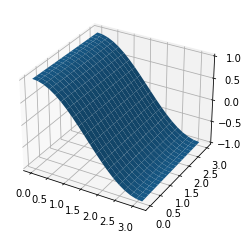

In [268]:

U = isxF(x,t)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,t_plt,np.array(U))
plt.show()



# Явная схема

двухточечная апроксимация с первым порядком

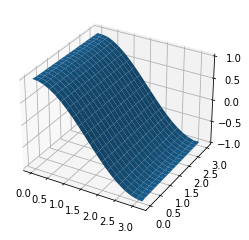

In [295]:

def yavnaya(n):
    u = [0]*n
    for i in range(n):
        u[i] = [0]*n
        
    
    for i in range(n):
        u[0][i] = np.cos(x[i])
        #print(u[0][i])
    
    for j in range(1,n-1):  #внутренние узлы
        for k in range(n-1):
            u[k+1][j] = u[k][j] + sigma1*u[k][j+1] - 2*sigma1*u[k][j] + sigma1*u[k][j-1] + sigma2*(u[k][j+1]-u[k][j-1])
            
    for k in range(0,n-1): #граничные условия
        u[k+1][0] = -(1/h)*u[k+1][1]/(-1-(1/h))+ phi0(t[k+1])/(-1-(1/h))

        #u[k+1][0] = (h*phi0(t[k+1])-u[k+1][1])/(-1-h)
        #u[i][n-1] = h*(-phi0(t[i]))+u[i-1][n-1]*(1+h)
        u[k+1][n-1] = (h*-(phi0(t[k+1]))-u[k+1][n-2])/(-1-h)
        
    return u    

fig = plt.figure()
ax = plt.axes(projection ='3d')

u = yavnaya(n)
ax.plot_surface(x_plt, t_plt, np.array(u))
plt.show()

трёхточечная апроксимация со вторым порядком

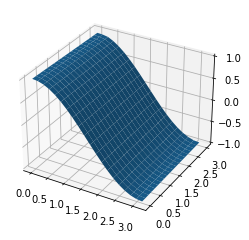

In [294]:
def yavnaya1(n):
    u = [0]*n
    for i in range(n):
        u[i] = [0]*n
        
    
    for i in range(n):
        u[0][i] = np.cos(x[i])
    
    for j in range(1,n-1):  #внутренние узлы
        for k in range(n-1):
            u[k+1][j] = u[k][j] + sigma1*u[k][j+1] - 2*sigma1*u[k][j] + sigma1*u[k][j-1] + sigma2*(u[k][j+1]-u[k][j-1])
            
    for k in range(0,n-1): #граничные условия
        #u[k+1][0] = -(1/h)*u[k+1][1]/(-1-(1/h))+ phi0(t[k+1])/(-1-(1/h))
        u[k+1][0] = (2*h*phi0(t[k+1])-4*u[k+1][1]+u[k+1][2])/(-3-2*h)
        #u[k+1][n-1] = (h*-(phi0(t[k+1]))-u[k+1][n-2])/(-1-h)
        u[k+1][n-1] = (2*h*phi0(t[k+1])+4*u[k+1][n-2]-u[k+1][n-3])/(3+2*h)
        
    return u  

fig = plt.figure()
ax = plt.axes(projection ='3d')

u = yavnaya1(n)
ax.plot_surface(x_plt, t_plt, np.array(u))
plt.show()

# Неявная схема

в моём втором граничном условии b[N] = 1/h-1, a[N] = -1/h, c[N] = 0, следовательно не выполняется условие диагонального преобладания, поэтому я решала систему методом Гаусса

двухточечная апроксимация с первым порядком

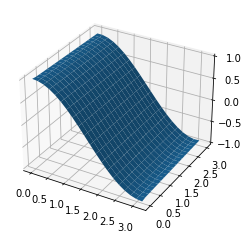

In [270]:

def neyavnaya2(n):
    un = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        un[0][i] = np.cos(x[i])
    
    for k in range(n-1):
        A = [[0 for j in range(n+1)] for i in range(n)]
        A[0][0] = -1-h
        A[0][1] = 1
        A[0][n] = h*phi0(t[k+1])
        for j in range(1,n-1):
            A[j][j-1] = -a/h/h+b/(2*h)
            A[j][j] = 1/tau + 2*a/h/h 
            A[j][j+1] = -a/h/h-b/(2*h)
            A[j][n] = un[k][j]/tau
        A[n-1][n-2] = -1-h
        A[n-1][n-1] = 1
        A[n-1][n] = -phi0(t[k+1])*h
        
        res = gauss(A)
        
        for j in range(n):
            un[k+1][j] = res[j]
    return un
        
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
x_plt, t_plt = np.meshgrid(x, t)
un = neyavnaya2(n)
ax1.plot_surface(x_plt,t_plt, np.array(un))
plt.show()

#ax1.plot(x,np.zeros(n),np.array(un[1]))
#print(un[1])

двухточечная апроксимация со вторым порядком

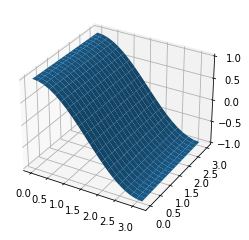

In [299]:
def neyavnaya(n):
    un = [0]*n
    for i in range(n):
        un[i] = [0]*n
    for i in range(n):
        un[0][i] = np.cos(x[i])
    
    
    for k in range(n-1):
        A = [[0 for j in range(n+1)] for i in range(n)]
        A[0][0] = 2*a/h+h/tau-(2*a-b*h)
        A[0][1] = (-2*a)/h
        A[0][n] = h/tau*un[k][0]+phi0(t[k+1])*(2*a-h*b)
        for j in range(1,n-1):
            A[j][j-1] = -a/h/h+b/(2*h)
            A[j][j] = 1/tau + 2*a/h/h 
            A[j][j+1] = -a/h/h-b/(2*h)
            A[j][n] = un[k][j]/tau
        A[n-1][n-2] = -2*a/h
        A[n-1][n-1] = 2*a/h+h/tau+(2*a+b*h)
        A[n-1][n] = h/tau*un[k][n-1]+phi0(t[k+1])*(2*a+h*b)
        
        res = gauss(A)
        
        for j in range(n):
            un[k+1][j] = res[j]
    return un

fig = plt.figure()
ax = plt.axes(projection ='3d')
un = neyavnaya(n)
ax.plot_surface(x_plt, t_plt, np.array(un))
plt.show()
    
    

# Неявно-явная схема

двухточечная апроксимация с первым порядком

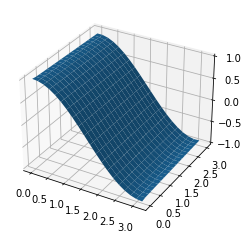

In [271]:
teta = 1/2

def neyavnoYavnaya(n):
    ukn = [0]*n
    for i in range(n):
        ukn[i] = [0]*n
    for i in range(n):
        ukn[0][i] = np.cos(x[i])
    
    for k in range(n-1):
        A = [[0 for j in range(n+1)] for i in range(n)]
        A[0][0] = -1-h
        A[0][1] = 1
        A[0][n] = h*phi0(t[k+1])
        for j in range(1,n-1):
            A[j][j-1] = (-a/h/h+b/(2*h))*teta
            A[j][j] = 1/tau+2*a*teta/(h*h)
            A[j][j+1] = (-a/h/h-b/(2*h))*teta
            A[j][n] = ukn[k][j]/tau + (1-teta)*a/h/h*(ukn[k][j-1]-2*ukn[k][j]+ukn[k][j+1])+b/2/h*(1-teta)*(ukn[k][j+1]-ukn[k][j-1])
        A[n-1][n-2] = -1-h
        A[n-1][n-1] = 1
        A[n-1][n] = -phi0(t[k+1])*h    
    
        res = gauss(A)
        
        for j in range(n):
            ukn[k+1][j] = res[j]
    return ukn

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
x_plt, t_plt = np.meshgrid(x, t)
ukn = neyavnoYavnaya(n)
ax1.plot_surface(x_plt,t_plt, np.array(ukn))
plt.show()
                         


In [227]:
def progonka(a,b,c,d):
    P = [0]*n
    Q = [0]*n
        
    P[0] = -c[0]/b[0]
    for i in range(1,n):
        P[i] = -c[i] / (b[i] + a[i] * P[i - 1])
        
    Q[0] = d[0] / b[0]
    for i in range(1,n):
        Q[i] = (d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1])
        
    result = [0]*n
    result[n-1] = Q[n-1]
    for i in range(n-2,0):
        result[i] = P[i] * result[i + 1] + Q[i]
        
    return result

In [296]:

def gauss(A):
    q = len(A)
    L = [[0 for j in range(q)] for i in range(q)]
    p = 0
    for i in range(0,q):
        L[i][i] = 1
    for i in range(q):
        if (A[i][i] == 0):
            for j in range(q):
                if (A[j][i] != 0):
                    for k in range(q):
                        tmp = A[i][k]
                        A[i][k] = A[j][k]
                        A[j][k] = tmp
        for j in range(i+1,q):
            for k in range(q-1,i-1,-1):
                if (k == i):
                    L[j][k] = A[j][i]/A[i][i]
                A[j][k] = A[j][k] - A[j][i]/A[i][i]*A[i][k]
    #print(L)
    U = [[0 for j in range(q)] for i in range(q)]
    for i in range(q):
        for j in range(q):
            U[i][j] = A[i][j]
    #print(U)
    z = np.zeros(q)
    for i in range(q):
        z[i] = A[i][q]
    for i in range(1,q):
        for j in range(0,i):
            z[i] = z[i] - L[i][j]*z[j]
    x = [0]*q
    x[q-1] = z[q-1]/U[q-1][q-1]
    for i in range(q-2,-1,-1):
        x[i] = z[i]
        for j in range(i+1,q):
            x[i] = x[i] - U[i][j]*x[j]
        x[i] = x[i]/U[i][i]
    
    return x
        
            
    

In [57]:
A = [[2,7,-8,6,-39],[4,4,0,-7,41],[-1,-3,6,3,4],[9,-7,-2,-8,113]]
A1 = [[2,4,-1,9],[7,4,-3,-7],[-8,0,6,-2],[6,-7,3,-8],[-39,41,4,113]]
res = gauss(A)
print(res)

[[1, 0, 0, 0], [2.0, 1, 0, 0], [-0.5, -0.05, 1, 0], [4.5, 3.85, -9.857142857142858, 1]]
[[2, 7, -8, 6], [0.0, -10.0, 16.0, -19.0], [0.0, 0.0, 2.8, 5.05], [0.0, 0.0, 0.0, 87.92857142857144]]
[8.000000000000004, -3.0000000000000013, 1.9999999999999993, -3.0]
